<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Graphics/%CE%93%CE%A1%CE%91%CE%A6%CE%97%CE%9C%CE%91%CE%A4%CE%91_NEWSBOMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import time
import random

from tqdm import tqdm

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
biden_articles_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/biden_articles_20_21.to.csv")
biden_articles_df.head()

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1228361/m...,Μπάιντεν: Διάγγελμα για το Αφγανιστάν- O Αμερι...,2021-08-31,22:55:19+03:00,ΚΟΣΜΟΣ,Νατάσα Παυλοπούλου,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ...",https://img.bbmd.gr/img/1260/max/82/2021/08/31...,NaN
1,https://www.newsbomb.gr/kosmos/story/1228111/m...,Μπλίνκεν: Θα συνεργαστούμε με τους Ταλιμπάν εά...,2021-08-31,06:15:09+03:00,ΚΟΣΜΟΣ,Γιάννης Καλύβας,«Κάθε βήμα που θα κάνουμε δεν θα βασίζεται στο...,Οι ΗΠΑ είναι διατεθειμένες να «συνεργαστούν» μ...,https://img.bbmd.gr/img/1260/max/82/2021/08/31...,(Jonathan Ernst/Pool via AP)
2,https://www.newsbomb.gr/kosmos/story/1228104/n...,Νέο διάγγελμα Μπάιντεν για το Αφγανιστάν,2021-08-31,02:00:50+03:00,ΚΟΣΜΟΣ,Γιάννης Καλύβας,Ο αμερικανός πρόεδρος Τζο Μπάιντεν θα εκφραστε...,"Όπως διευκρίνισε η αμερικανική προεδρία, ο κ. ...",https://img.bbmd.gr/img/1260/max/82/2021/08/30...,(AP Photo/Manuel Balce Ceneta)
3,https://www.newsbomb.gr/kosmos/story/1227974/t...,Τυφώνας Άιντα: Η στιγμή που οι σφοδροί άνεμοι ...,2021-08-30,15:17:36+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο τυφώνας Άιντα έφθασε πάνω από το έδαφος όντα...,Viral έχει γίνει στο διαδίκτυο ένα σοκαριστικό...,https://img.bbmd.gr/img/1260/max/82/2021/08/30...,Οι δυνατοί άνεμοι ξηλώνουν την οροφή του νοσοκ...
4,https://www.newsbomb.gr/kosmos/story/1227963/s...,Σάλος με τον Μπαίντεν να κοιτά το ρολόι του στ...,2021-08-30,14:45:20+03:00,ΚΟΣΜΟΣ,Newsbomb,Πύρα δέχεται ο πρόεδρος των ΗΠΑ Τζο Μπάιντεν μ...,"Σύμφωνα με την Daily Mail, o Τζο Μπάιντεν ταξί...",https://img.bbmd.gr/img/1260/max/82/2021/08/30...,"Κατά τη διάρκεια της τελετής, ο Μπάιντεν εμφαν..."


In [25]:
# prompt: φέρε μου τα άρθρα από το απριλιο του 21 μέχρι τον νοέμβριο του 20

# Convert the 'date' column to datetime objects
biden_articles_df['date'] = pd.to_datetime(biden_articles_df['date'])

# Filter articles from April 2021 to November 2020
filtered_articles_df = biden_articles_df[(biden_articles_df['date'] <= '2021-04-30') & (biden_articles_df['date'] >= '2020-11-01')]

# Print or display the filtered DataFrame
filtered_articles_df


,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
286,https://www.newsbomb.gr/kosmos/story/1191654/t...,Τζο Μπάιντεν: Αναποφάσιστος ως προς τον υποχρε...,2021-04-30,15:52:22+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...,Ο πρόεδρος Τζο Μπάιντεν δήλωσε ότι δεν έχει ακ...,https://img.bbmd.gr/img/1260/max/82/2021/04/30...,NaN
287,https://www.newsbomb.gr/kosmos/story/1191396/h...,ΗΠΑ: Οι Αμερικανοί στηρίζουν τα οικονομικά μέτ...,2021-04-29,23:50:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Η πλειονότητα των Αμερικανών στηρίζει τα οικον...,Η δημοσκόπηση αυτή δείχνει επίσης ότι οι Ρεπου...,https://img.bbmd.gr/img/1260/max/82/2021/04/29...,NaN
288,https://www.newsbomb.gr/kosmos/story/1191143/h...,ΗΠΑ: Η Αμερική «πάει μπροστά» λέει ο Μπάιντεν ...,2021-04-29,08:51:26+03:00,ΚΟΣΜΟΣ,Newsbomb,"Σαρωτικές προτάσεις για θέσεις εργασίας, εκπαί...",Παραμονές της συμπλήρωσης100 ημερώναπο την εκλ...,https://img.bbmd.gr/img/1260/max/82/2021/04/29...,"H πρώτη κυρία των ΗΠΑ, Τζιλ ΜπάιντενA.P"
289,https://www.newsbomb.gr/kosmos/story/1191106/h...,ΗΠΑ: Γράφτηκε ιστορία στο Κογκρέσο - Πίσω από ...,2021-04-29,06:44:41+03:00,ΚΟΣΜΟΣ,Γιάννης Φιλιππάκος,Κάτι που δεν έχει ξανασυμβεί διαδραματίστηκε τ...,"Στα 81 της, η επικεφαλής των Δημοκρατικών στο ...",https://img.bbmd.gr/img/1260/max/82/2021/04/29...,AP Photo
290,https://www.newsbomb.gr/kosmos/story/1190753/o...,Ο Κιλιντσάρογλου «σφυροκοπά» τον Ερντογάν – «Α...,2021-04-28,10:19:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Επίθεση στον Ρετζέπ Ταγίπ Ερντογάν εξαπέλυσε η...,Ο ηγέτης της κεμαλικής αντιπολίτευσης (CHP)Κεμ...,https://img.bbmd.gr/img/1260/max/82/2021/04/28...,ASSOCIATED PRESS
...,...,...,...,...,...,...,...,...,...,...
845,https://www.newsbomb.gr/kosmos/story/1132775/e...,Εκλογές ΗΠΑ 2020 - Δημοσκόπηση: Προβάδισμα 7 μ...,2020-11-01,21:43:04+02:00,ΚΟΣΜΟΣ,Newsbomb,Εκλογές ΗΠΑ 2020: Στην τελική ευθεία η μάχη Τρ...,Με τις αμερικανικές προεδρικές εκλογές να απέχ...,https://img.bbmd.gr/img/1260/max/82/2020/11/01...,AP
846,https://www.newsbomb.gr/kosmos/story/1132686/e...,Εκλογές ΗΠΑ 2020: Τραμπ εναντίον Μπάιντεν – Τι...,2020-11-01,14:25:49+02:00,ΚΟΣΜΟΣ,Χρήστος Γιαννούλης,Προεδρικές Εκλογές ΗΠΑ 2020: Ένα 48ωρο πριν απ...,Οι ψηφοφόροι στις ΗΠΑ θα αποφασίσουν στις 3 Νο...,https://img.bbmd.gr/img/1260/max/82/2020/11/01...,Τι δείχνουν οι δημοσκοπήσεις για τις εκλογές τ...
847,https://www.newsbomb.gr/kosmos/story/1132681/e...,Εκλογές ΗΠΑ 2020: Ο Τραμπ επιτίθεται στον «κοι...,2020-11-01,13:55:24+02:00,ΚΟΣΜΟΣ,Χρήστος Γιαννούλης,Εκλογές ΗΠΑ 2020: Ο Ντόναλντ Τραμπ υποστήριξε ...,Η μάχη τωνΠροεδρικών Εκλογών στις ΗΠΑκορυφώνετ...,https://img.bbmd.gr/img/1260/max/82/2020/11/01...,"Ο Αμερικανός πρόεδρος, Ντόναλντ Τραμπ\nAP Images"
848,https://www.newsbomb.gr/kosmos/story/1132645/e...,Εκλογές ΗΠΑ 2020: Κορυφώνεται η μάχη Τραμπ vs ...,2020-11-01,11:16:56+02:00,ΚΟΣΜΟΣ,Χρήστος Γιαννούλης,Εκλογές ΗΠΑ 2020: Δυο ημέρες πριν κλείσουν οι ...,«Φωτιά» έχει πάρει το επιτελείο τουΝτόναλντ Τρ...,https://img.bbmd.gr/img/1260/max/82/2020/11/01...,Λιγότερες από 48 ώρες για την τελική αναμέτρησ...


<ipython-input-26-3631768153>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_articles_df['month_year'] = filtered_articles_df['date'].dt.to_period('M')


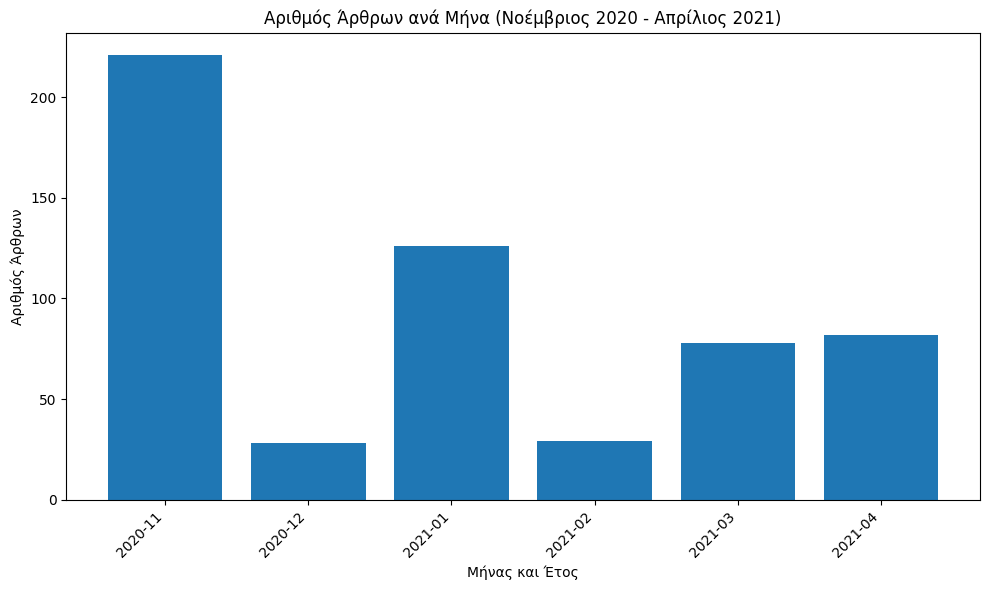

In [26]:
# prompt: κάνε μου ένα bar chart με τον αριθμό των άρθρων ανά μήνα. Από Νοέμβριο μέχρι Απρίλιο

import matplotlib.pyplot as plt

# Extract the month and year from the 'date' column
filtered_articles_df['month_year'] = filtered_articles_df['date'].dt.to_period('M')

# Count the number of articles per month
monthly_counts = filtered_articles_df['month_year'].value_counts().sort_index()

# Convert PeriodIndex to string for plotting
monthly_counts.index = monthly_counts.index.astype(str)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Μήνας και Έτος')
plt.ylabel('Αριθμός Άρθρων')
plt.title('Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021) - Φθίνουσα Σειρά:
2020-11: 221
2021-01: 126
2021-04: 82
2021-03: 78
2021-02: 29
2020-12: 28


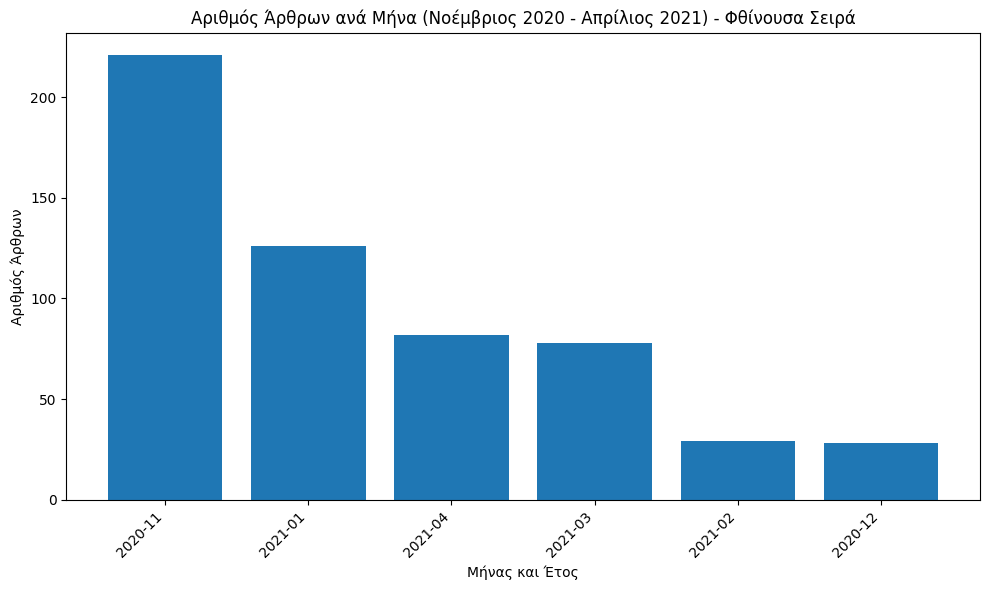

In [27]:
monthly_counts_desc = filtered_articles_df['month_year'].value_counts().sort_values(ascending=False)

# Print the monthly counts with the number of articles
print("Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021) - Φθίνουσα Σειρά:")
for month_year, count in monthly_counts_desc.items():
    print(f"{month_year}: {count}")

# Convert PeriodIndex to string for plotting
monthly_counts_desc.index = monthly_counts_desc.index.astype(str)

# Create the bar chart in descending order
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts_desc.index, monthly_counts_desc.values)
plt.xlabel('Μήνας και Έτος')
plt.ylabel('Αριθμός Άρθρων')
plt.title('Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021) - Φθίνουσα Σειρά')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import time
import random

from tqdm import tqdm

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
trump_articles_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/trump_df_2025.csv")
trump_articles_df.head()

,title,article_url,date,time,section,excerpt
0,Πρόεδρος FED για δασμούς Τραμπ: «Πιθανώς θα αυ...,/kosmos/story/1639695/proedros-fed-gia-dasmoys...,04.04.2025,18:39,ΚΟΣΜΟΣ,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...
1,Ο Ντόναλντ Τραμπ κάλεσε τον πρόεδρο της Ομοσπο...,/kosmos/story/1639686/o-donalnt-tramp-kalese-t...,04.04.2025,18:14,ΚΟΣΜΟΣ,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα..."
2,«Σεισμός» στα διεθνή χρηματιστήρια μετά την δι...,/kosmos/story/1639685/seismos-sta-diethni-xrim...,04.04.2025,18:07,ΚΟΣΜΟΣ,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...
3,Ο Τραμπ παίζει γκολφ καθώς οι αμερικανικές μετ...,/kosmos/story/1639670/o-tramp-paizei-golf-kath...,04.04.2025,17:30,ΚΟΣΜΟΣ,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα..."
4,"«Κάρφωσε» την Κίνα ο Τραμπ: «Πανικοβλήθηκε, το...",/kosmos/story/1639656/karfose-tin-kina-o-tramp...,04.04.2025,16:46,ΚΟΣΜΟΣ,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...


In [31]:
trump_articles_df

,title,article_url,date,time,section,excerpt
0,Πρόεδρος FED για δασμούς Τραμπ: «Πιθανώς θα αυ...,/kosmos/story/1639695/proedros-fed-gia-dasmoys...,04.04.2025,18:39,ΚΟΣΜΟΣ,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...
1,Ο Ντόναλντ Τραμπ κάλεσε τον πρόεδρο της Ομοσπο...,/kosmos/story/1639686/o-donalnt-tramp-kalese-t...,04.04.2025,18:14,ΚΟΣΜΟΣ,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα..."
2,«Σεισμός» στα διεθνή χρηματιστήρια μετά την δι...,/kosmos/story/1639685/seismos-sta-diethni-xrim...,04.04.2025,18:07,ΚΟΣΜΟΣ,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...
3,Ο Τραμπ παίζει γκολφ καθώς οι αμερικανικές μετ...,/kosmos/story/1639670/o-tramp-paizei-golf-kath...,04.04.2025,17:30,ΚΟΣΜΟΣ,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα..."
4,"«Κάρφωσε» την Κίνα ο Τραμπ: «Πανικοβλήθηκε, το...",/kosmos/story/1639656/karfose-tin-kina-o-tramp...,04.04.2025,16:46,ΚΟΣΜΟΣ,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...
...,...,...,...,...,...,...
1426,Αμερικανικές εκλογές 2024: Ο Ντόναλντ Τραμπ μα...,/kosmos/story/1599378/amerikanikes-ekloges-202...,06.11.2024,07:00,ΚΟΣΜΟΣ,Από την πρώτη στιγμή ο Έλον Μασκ βρίσκεται στο...
1427,Ενισχύονται τα μέτρα ασφαλείας στον Πύργο Τραμ...,/kosmos/story/1599375/ekloges-ipa-2024-enisxyo...,06.11.2024,06:55,ΚΟΣΜΟΣ,Αναπτύσσονται αστυνομικές δυνάμεις σε κρίσιμα ...
1428,Εκλογές ΗΠΑ 2024: Οι Μυστικές Υπηρεσίες ζητησα...,/kosmos/story/1599372/ekloges-ipa-2024-oi-myst...,06.11.2024,06:44,ΚΟΣΜΟΣ,Το Newsbomb.gr μεταδίδει απευθείας από το Καπι...
1429,Αγοραστική τρέλα για κρυπονομίσματα λόγω Τραμπ...,/oikonomia/story/1599370/amerikanikes-ekloges-...,06.11.2024,06:41,ΟΙΚΟΝΟΜΙΑ,Ο Τραμπ έχει δεσμευτεί να κάνει τις ΗΠΑ την υπ...


<ipython-input-32-851622469>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trump_articles_df['month_year'] = filtered_trump_articles_df['date'].dt.to_period('M')


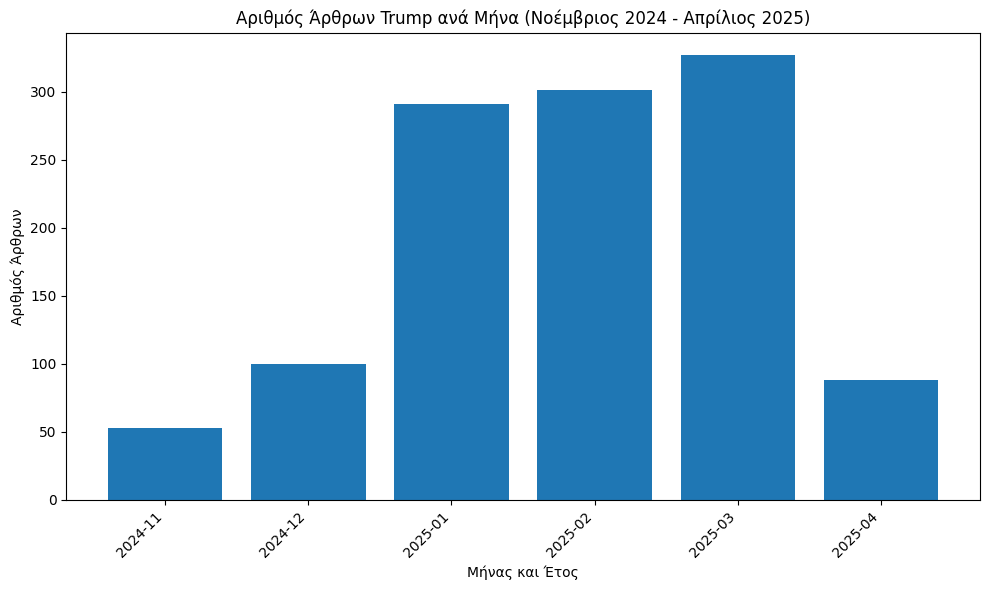

In [32]:
# prompt:  prompt: κάνε μου ένα bar chart με τον αριθμό των άρθρων ανά μήνα. Από τις 20/11/ 2024 μέχρι Απρίλιο 2025. Από 20/11/2024

# Convert the 'date' column to datetime objects
# Specify the correct format %d.%m.%Y for day.month.year
trump_articles_df['date'] = pd.to_datetime(trump_articles_df['date'], format='%d.%m.%Y')

# Filter articles from November 20, 2024 to April 2025
filtered_trump_articles_df = trump_articles_df[(trump_articles_df['date'] >= '2024-11-20') & (trump_articles_df['date'] <= '2025-04-30')]

# Extract the month and year from the 'date' column
filtered_trump_articles_df['month_year'] = filtered_trump_articles_df['date'].dt.to_period('M')

# Count the number of articles per month
monthly_trump_counts = filtered_trump_articles_df['month_year'].value_counts().sort_index()

# Convert PeriodIndex to string for plotting
monthly_trump_counts.index = monthly_trump_counts.index.astype(str)

# Create the bar chart
import matplotlib.pyplot as plt # Make sure matplotlib is imported
plt.figure(figsize=(10, 6))
plt.bar(monthly_trump_counts.index, monthly_trump_counts.values)
plt.xlabel('Μήνας και Έτος')
plt.ylabel('Αριθμός Άρθρων')
plt.title('Αριθμός Άρθρων Trump ανά Μήνα (Νοέμβριος 2024 - Απρίλιος 2025)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-33-751074397>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trump_articles_df['month_year'] = filtered_trump_articles_df['date'].dt.to_period('M')


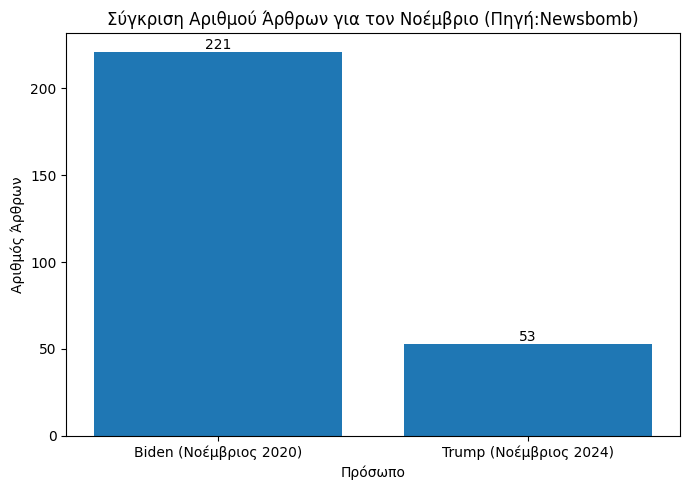

In [33]:
if 'date' in trump_articles_df.columns:
    try:
        trump_articles_df['date'] = pd.to_datetime(trump_articles_df['date'], format='%d.%m.%Y')

        # Filter articles from November 20, 2024 to April 2025
        filtered_trump_articles_df = trump_articles_df[(trump_articles_df['date'] >= '2024-11-20') & (trump_articles_df['date'] <= '2025-04-30')]

        # Extract the month and year from the 'date' column
        filtered_trump_articles_df['month_year'] = filtered_trump_articles_df['date'].dt.to_period('M')

        # Count the number of articles per month (not needed for the November comparison, but good practice)
        # monthly_trump_counts = filtered_trump_articles_df['month_year'].value_counts().sort_index()

    except Exception as e:
        print(f"Error processing 'date' column or filtering for Trump articles: {e}")
        # Handle the error, perhaps by exiting or setting filtered_trump_articles_df to an empty DataFrame
        filtered_trump_articles_df = pd.DataFrame(columns=trump_articles_df.columns.tolist() + ['month_year'])
else:
    print("'date' column not found in trump_articles_df. Cannot filter or compare.")
    # Handle the missing column, perhaps by exiting or setting filtered_trump_articles_df to an empty DataFrame
    filtered_trump_articles_df = pd.DataFrame(columns=['month_year']) # Ensure 'month_year' column exists for subsequent steps

# --- End of code from the cell that defines filtered_trump_articles_df ---

# Filter for November articles for both dataframes
# Check if 'month_year' column exists before filtering
if 'month_year' in filtered_articles_df.columns:
    november_biden_count = filtered_articles_df[filtered_articles_df['month_year'] == '2020-11'].shape[0]
else:
    print("'month_year' column not found in filtered_articles_df. Cannot calculate Biden November count.")
    november_biden_count = 0 # Assign a default value

if 'month_year' in filtered_trump_articles_df.columns:
    november_trump_count = filtered_trump_articles_df[filtered_trump_articles_df['month_year'] == '2024-11'].shape[0]
else:
    print("'month_year' column not found in filtered_trump_articles_df. Cannot calculate Trump November count.")
    november_trump_count = 0 # Assign a default value


# Create a DataFrame for plotting the November counts
november_counts_df = pd.DataFrame({
    'Πρόσωπο': ['Biden (Νοέμβριος 2020)', 'Trump (Νοέμβριος 2024)'],
    'Αριθμός Άρθρων': [november_biden_count, november_trump_count]
})

# Create the bar chart for November comparison
import matplotlib.pyplot as plt # Ensure matplotlib is imported
plt.figure(figsize=(7, 5))
bars = plt.bar(november_counts_df['Πρόσωπο'], november_counts_df['Αριθμός Άρθρων'])
plt.xlabel('Πρόσωπο')
plt.ylabel('Αριθμός Άρθρων')
plt.title("Σύγκριση Αριθμού Άρθρων για τον Νοέμβριο (Πηγή:Newsbomb)")
plt.xticks(rotation=0)
plt.tight_layout()

# Add the count numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

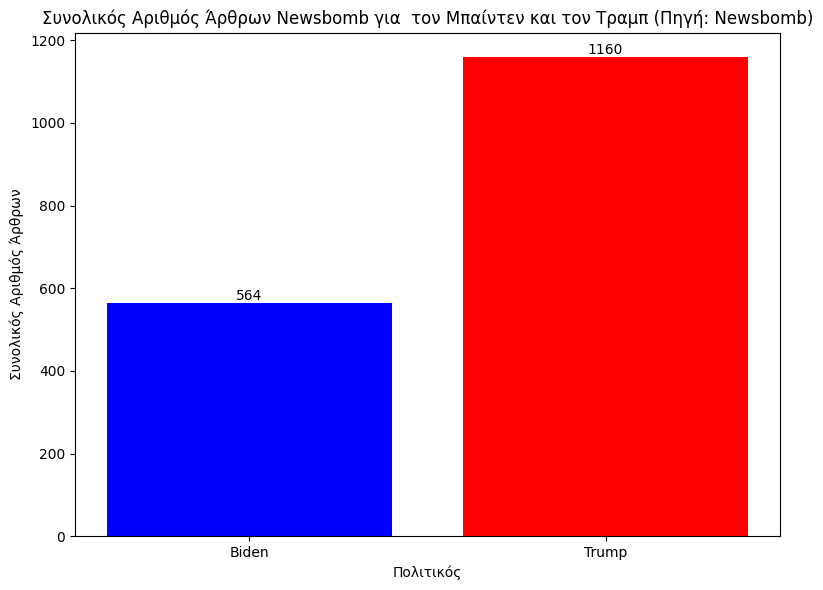

In [34]:
total_biden_articles = len(filtered_articles_df)
total_trump_articles = len(filtered_trump_articles_df)

# Create a list of names and counts
names = ['Biden', 'Trump']
counts = [total_biden_articles, total_trump_articles]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(names, counts, color=['blue', 'red']) # Optional: use different colors for visual distinction

# Add labels and title
plt.xlabel('Πολιτικός')
plt.ylabel('Συνολικός Αριθμός Άρθρων')
plt.title("Συνολικός Αριθμός Άρθρων Newsbomb για  τον Μπαίντεν και τον Τραμπ (Πηγή: Newsbomb)")
plt.xticks(rotation=0)
plt.tight_layout()

# Add the count numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()

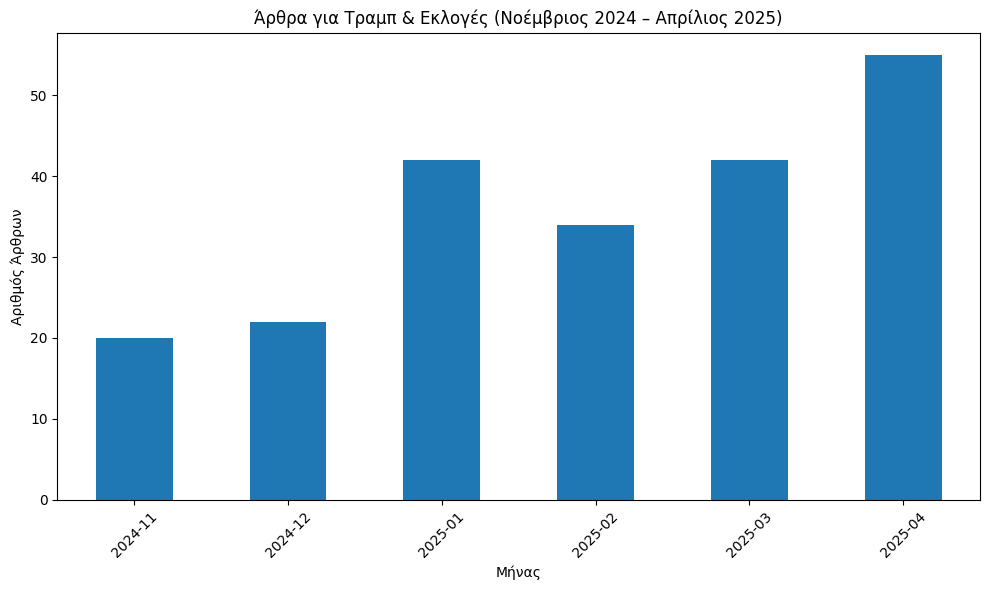

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Φόρτωση αρχείου
trump_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/trump_df_2025.csv")

# Μετατροπή της στήλης 'date' σε datetime
trump_df['date'] = pd.to_datetime(trump_df['date'], errors='coerce')

# Λέξεις-κλειδιά σχετικές με εκλογές
election_keywords = [
    'εκλογές', 'ψηφοφορία', 'προεδρικές',
    'Trump', 'Τραμπ', 'αναμέτρηση'
]

# Συνένωση τίτλου και περίληψης για αναζήτηση λέξεων-κλειδιών
trump_df['combined_text'] = (
    trump_df['title'].fillna('') + ' ' +
    trump_df['excerpt'].fillna('')
).str.lower()

# Φιλτράρισμα άρθρων που περιέχουν τουλάχιστον μία λέξη-κλειδί
election_trump_df = trump_df[
    trump_df['combined_text'].apply(
        lambda text: any(keyword.lower() in text for keyword in election_keywords)
    )
]

# Φιλτράρισμα για χρονικό διάστημα: Νοέμβριος 2024 – Απρίλιος 2025
start_date = pd.Timestamp("2024-11-01")
end_date = pd.Timestamp("2025-04-30")
election_trump_df = election_trump_df[
    (election_trump_df['date'] >= start_date) &
    (election_trump_df['date'] <= end_date)
]

# Δημιουργία στήλης μήνας-έτος
election_trump_df['month_year'] = election_trump_df['date'].dt.to_period('M')

# Ομαδοποίηση και μέτρηση άρθρων ανά μήνα
trump_articles_per_month = election_trump_df['month_year'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(10, 6))
trump_articles_per_month.plot(kind='bar')
plt.title('Άρθρα για Τραμπ & Εκλογές (Νοέμβριος 2024 – Απρίλιος 2025)')
plt.xlabel('Μήνας')
plt.ylabel('Αριθμός Άρθρων')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-36-3607698731>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_articles_df['month_year'] = election_articles_df['date'].dt.to_period('M')


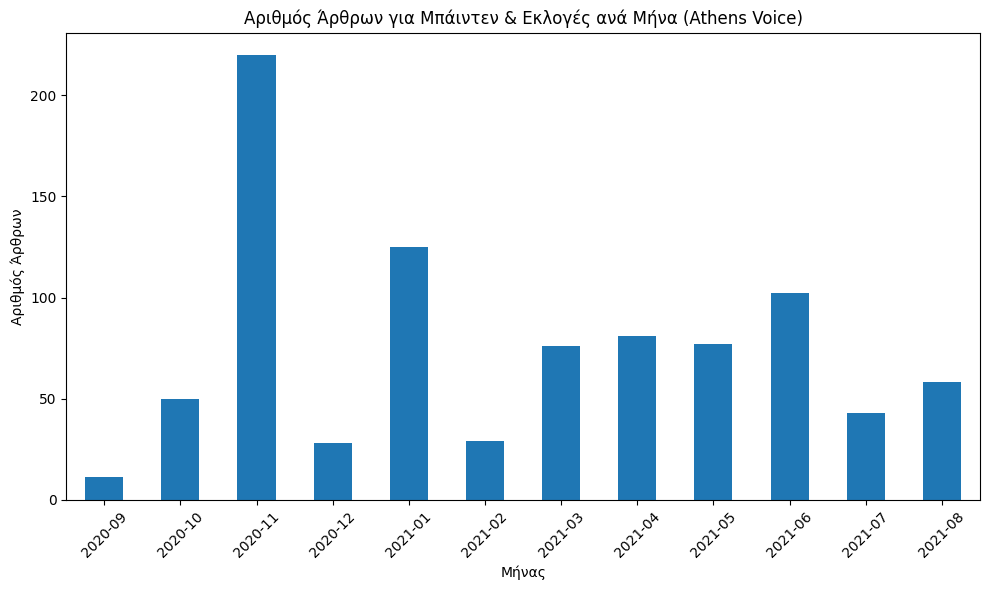

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Φόρτωσε το αρχείο
biden_articles_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/biden_articles_20_21.to.csv")

# Μετατροπή της στήλης 'date' σε datetime
biden_articles_df['date'] = pd.to_datetime(biden_articles_df['date'], errors='coerce')

# Λέξεις-κλειδιά σχετικές με τις εκλογές
election_keywords = ['εκλογές', 'ψηφοφορία', 'προεδρικές', 'Biden', 'Μπάιντεν', 'Καπιτώλιο', 'αναμέτρηση']

# Συνένωση κειμένων για αναζήτηση (τίτλος, περίληψη, σώμα)
biden_articles_df['combined_text'] = (
    biden_articles_df['title'].fillna('') + ' ' +
    biden_articles_df['excerpt'].fillna('') + ' ' +
    biden_articles_df['text_body'].fillna('')
).str.lower()

# Φιλτράρισμα άρθρων που περιέχουν λέξεις-κλειδιά
election_articles_df = biden_articles_df[
    biden_articles_df['combined_text'].apply(
        lambda text: any(keyword.lower() in text for keyword in election_keywords)
    )
]

# Προσθήκη στήλης με μήνα-έτος
election_articles_df['month_year'] = election_articles_df['date'].dt.to_period('M')

# Μέτρηση άρθρων ανά μήνα
articles_per_month = election_articles_df['month_year'].value_counts().sort_index()

# Δημιουργία γραφήματος
plt.figure(figsize=(10, 6))
articles_per_month.plot(kind='bar')
plt.title('Αριθμός Άρθρων για Μπάιντεν & Εκλογές ανά Μήνα (Athens Voice)')
plt.xlabel('Μήνας')
plt.ylabel('Αριθμός Άρθρων')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import time
import random

from tqdm import tqdm

Columns in trump_df: Index(['title', 'article_url', 'date', 'time', 'section', 'excerpt',
       'combined_text'],
      dtype='object')
Columns in biden_df: Index(['article_url', 'title', 'date', 'time', 'section', 'author', 'excerpt',
       'text_body', 'feat_img_link', 'feat_img_cation', 'combined_text'],
      dtype='object')
         Biden  Trump
Λέξη                 
Ελλάδα     886     31
Τουρκία    150     19
εκλογές    312     69


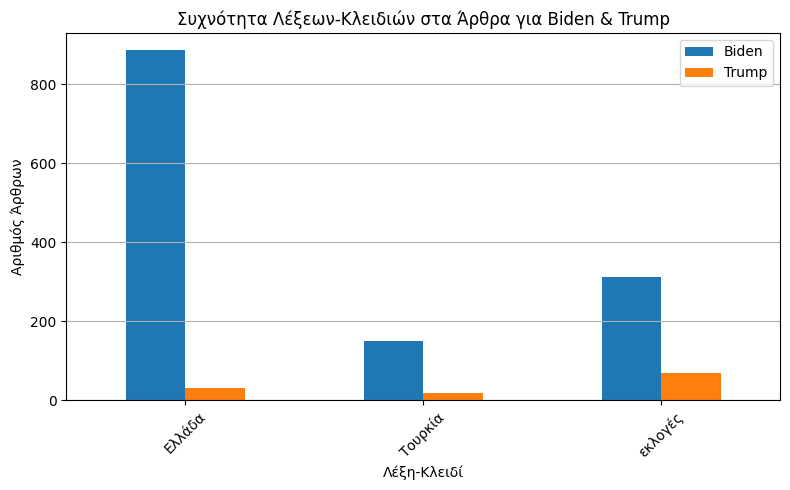

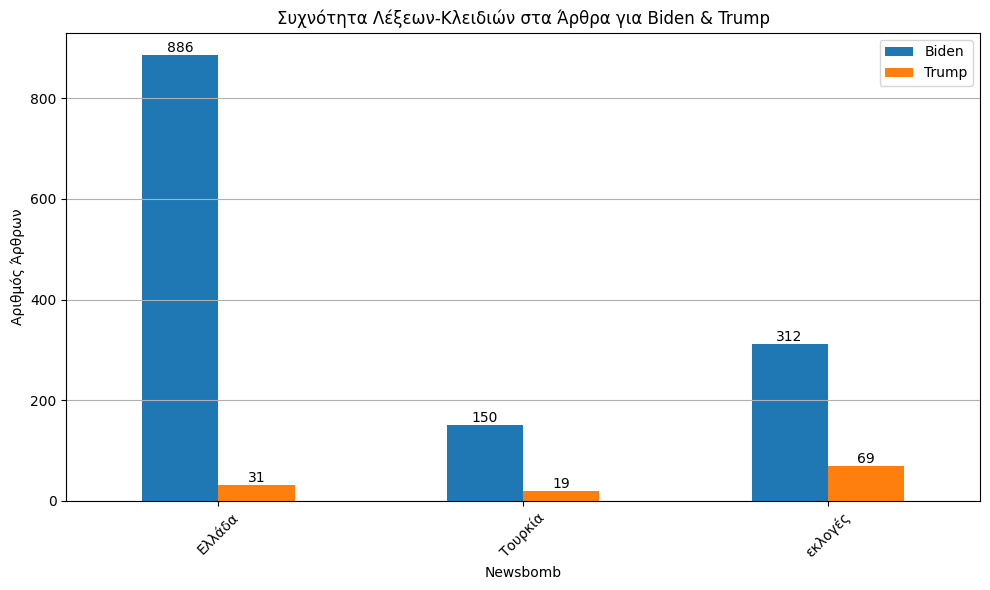

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Ορίζουμε τις λέξεις-κλειδιά για αναζήτηση
keywords = ['Ελλάδα', 'Τουρκία' , 'εκλογές']

# Συνάρτηση για καταμέτρηση λέξεων-κλειδιών σε τίτλο και κείμενο
def keyword_stats(df, keywords):
    counts = {}
    # Check if 'text_body' column exists in the DataFrame
    if 'text_body' not in df.columns:
        print(f"Warning: 'text_body' column not found in the DataFrame. Skipping text body search.")
        # If 'text_body' is missing, only search in the 'title' column
        for word in keywords:
            mask_title = df['title'].str.contains(word, case=False, na=False)
            counts[word] = mask_title.sum()
    else:
        # If 'text_body' exists, search in both 'title' and 'text_body'
        for word in keywords:
            mask_title = df['title'].str.contains(word, case=False, na=False)
            mask_body = df['text_body'].str.contains(word, case=False, na=False)
            counts[word] = (mask_title | mask_body).sum()
    return pd.DataFrame.from_dict(counts, orient='index', columns=['Συχνότητα'])

# Check the columns of trump_df before calling the function
print("Columns in trump_df:", trump_df.columns)
print("Columns in biden_df:", biden_articles_df.columns) # Assuming biden_df is also loaded and used

biden_keyword_df = keyword_stats(biden_articles_df, keywords).rename(columns={"Συχνότητα": "Biden"})
trump_keyword_df = keyword_stats(trump_df, keywords).rename(columns={"Συχνότητα": "Trump"})

combined_keywords_df = pd.concat([biden_keyword_df, trump_keyword_df], axis=1)
combined_keywords_df.index.name = "Λέξη"

print(combined_keywords_df)

combined_keywords_df.plot(kind='bar', figsize=(8, 5))
plt.title("Συχνότητα Λέξεων-Κλειδιών στα Άρθρα για Biden & Trump")
plt.ylabel("Αριθμός Άρθρων")
plt.xlabel("Λέξη-Κλειδί")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar Chart για σύγκριση με εμφάνιση αριθμών
ax = combined_keywords_df.plot(kind='bar', figsize=(10, 6))
plt.title("Συχνότητα Λέξεων-Κλειδιών στα Άρθρα για Biden & Trump")
plt.ylabel("Αριθμός Άρθρων")
plt.xlabel("Newsbomb")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Προσθήκη των ακριβών αριθμών πάνω από τις μπάρες
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

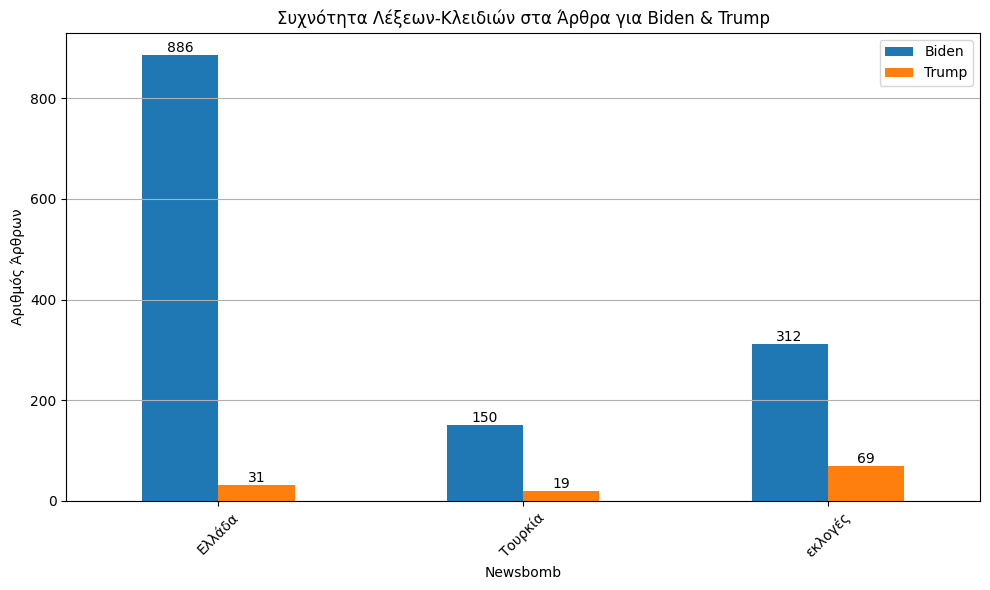

In [39]:
# prompt: μπορείς να βάλεις να φαίνεται και ο ακριβείς αριθμός στο διάγραμμα;

# Bar Chart για σύγκριση με εμφάνιση αριθμών
ax = combined_keywords_df.plot(kind='bar', figsize=(10, 6))
plt.title("Συχνότητα Λέξεων-Κλειδιών στα Άρθρα για Biden & Trump")
plt.ylabel("Αριθμός Άρθρων")
plt.xlabel("Newsbomb")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Προσθήκη των ακριβών αριθμών πάνω από τις μπάρες
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()
